<a href="https://colab.research.google.com/github/macde58/Proyecto-Final/blob/main/Proyecto_Final_MAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 PROYECTO FINAL  - PREDICCION DE PRECIOS DE CASAS 
#-----------------------------------------------------

## Miguel Angel Cardona de la Rosa
## Canet 08001084

**IMPORTACION DE LIBRERIAS**
### se cargan las librerias autolizadas a usar durante el proyecto


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

**CARGA DE DATA**

 Se carga a la estructura de este proyecto  el dataset dado para el proyecto

In [20]:
datafile = "proyecto_training_data.npy"
data= np.load(datafile)
print(data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


**EXPLORACION DEL DATASET**

Se explora el dataset, validando su tipo de datos, shape y los valores nan que posea

In [21]:
print("INFORMACION DEL DATASET")
print("Shape:       ", data.shape)
print("Tipo:        ", type(data))
print("Valores Nan:  ", np.isnan(data).sum())

INFORMACION DEL DATASET
Shape:        (1460, 6)
Tipo:         <class 'numpy.ndarray'>
Valores Nan:   259


**LIMIPIEZA DEL DATASET**

En el paso anterior se determina que la estructura contiene 259 valoron "nan" , por lo que el siguiente paso se reasigan




In [22]:
data=data[~np.isnan(data).any(axis=1)]

In [23]:
print("INFORMACION DEL DATASET")
print("Shape:       ", data.shape)
print("Tipo:        ", type(data))
print("Valores Nan:  ", np.isnan(data).sum())

INFORMACION DEL DATASET
Shape:        (1201, 6)
Tipo:         <class 'numpy.ndarray'>
Valores Nan:   0


**EXPLORACION  DATAFRAME COMPLETO**

Ya habiendo reemplazado todos los datos nan, se utiliza esta estructura para presentar los datos solicitados que son:


*   Media
*   Max
*   Min
*   Deviacion Estandar 
*   Rango[link text](https://)



In [24]:
## usando pandas para convertir lo s datos 
columnas = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
data_frame =pd.DataFrame(data,columns=columnas)
print(data_frame)


      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1196   175000.0          6.0     953.0           7.0     1999.0         62.0
1197   210000.0          6.0    2073.0           7.0     1978.0         85.0
1198   266500.0          7.0    1188.0           9.0     1941.0         66.0
1199   142125.0          5.0    1078.0           5.0     1950.0         68.0
1200   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1201 rows x 6 columns]


In [16]:
data_frame

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1196,175000.0,6.0,953.0,7.0,1999.0,62.0
1197,210000.0,6.0,2073.0,7.0,1978.0,85.0
1198,266500.0,7.0,1188.0,9.0,1941.0,66.0
1199,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [8]:
## Analisis estadistico
data_frame.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,180770.480433,6.122398,1158.437968,6.535387,1970.580350,70.049958
std,83389.519866,1.419216,386.257235,1.629608,31.750335,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,127500.000000,5.000000,876.000000,5.000000,1950.000000,59.000000
50%,159500.000000,6.000000,1082.000000,6.000000,1972.000000,69.000000
75%,213500.000000,7.000000,1383.000000,7.000000,2003.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


**DATA TRAIN Y TESTING**

Se realiza la division de la data para Training y para el ambiente testing.
 

Trainig = 80% del dataset

Testing= 20% del dataset,



In [48]:
ochentaPorciento=int(data.shape[0]*0.8)
print("el 80% de dataset es: ",ochentaPorciento)
train=data[:ochentaPorciento,:]
print ("Tamaño de Train: ",train.shape)
test=data[ochentaPorciento:,:]
print ("Tamaño de Test: ",test.shape)

el 80% de dataset es:  960
Tamaño de Train:  (960, 6)
Tamaño de Test:  (241, 6)


In [56]:
train_frame =pd.DataFrame(train,columns=columnas)
print("******************")
print("Datos de Training")
print("******************")
print(train_frame.describe())
test_frame=pd.DataFrame(test,columns=columnas)
print("")
print("")
print("******************")
print("Datos de TEST")
print("******************")
print(test_frame.describe())

******************
Datos de Training
******************
           SalePrice  OverallQual  ...    YearBuilt  LotFrontage
count     960.000000   960.000000  ...   960.000000   960.000000
mean   180935.536458     6.122917  ...  1970.596875    69.965625
std     83391.805232     1.418445  ...    31.538562    23.498671
min     34900.000000     1.000000  ...  1875.000000    21.000000
25%    127500.000000     5.000000  ...  1950.000000    59.000000
50%    159467.000000     6.000000  ...  1972.000000    70.000000
75%    214000.000000     7.000000  ...  2003.000000    80.000000
max    755000.000000    10.000000  ...  2010.000000   313.000000

[8 rows x 6 columns]


******************
Datos de TEST
******************
           SalePrice  OverallQual  ...    YearBuilt  LotFrontage
count     241.000000   241.000000  ...   241.000000   241.000000
mean   180112.995851     6.120332  ...  1970.514523    70.385892
std     83550.704017     1.425234  ...    32.647116    27.242515
min     52500.000000   

**HISTOGRAMAS**

Se realiza la presentacion de cada histograma  de cada varialble definido su tamaño. 


In [57]:
##plt.figure(figsize=(20, 10)) #
##plt.subplots_adjust(hspace=0.4, wspace=0.2)

colores = ["g","r","y","b","g","b"]#colores para graficas


HISTOGRAMAS PARA DATAFRAME ORIGINAL


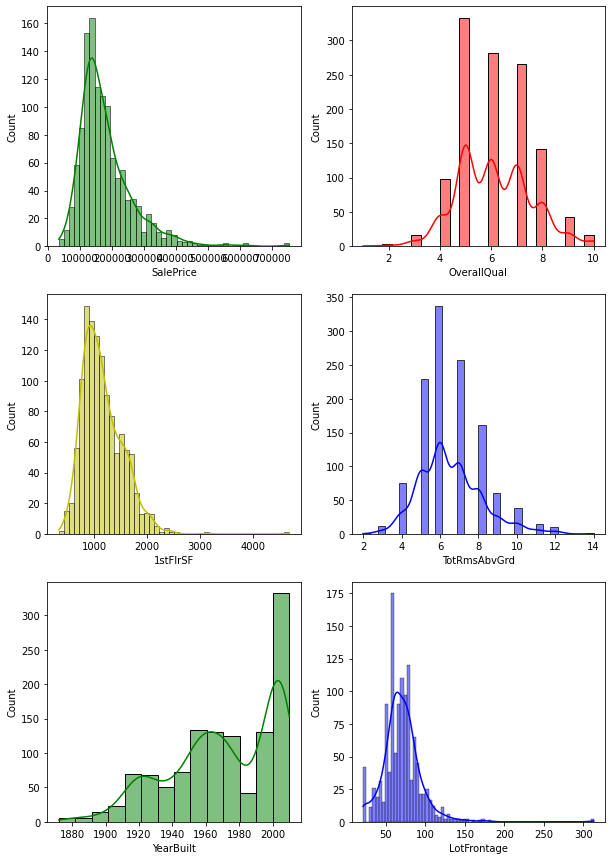

In [64]:
print ("HISTOGRAMAS PARA DATAFRAME ORIGINAL")
f,eje = plt.subplots(3,2,sharex=False, figsize=(10,15))
for i in range(0,len(columnas)): 
    sns.histplot(data_frame[columnas[i]] , color=colores[i], kde=True, ax=eje[i//2, i%2])
    

HISTOGRAMAS PARA DATOS TRAINING


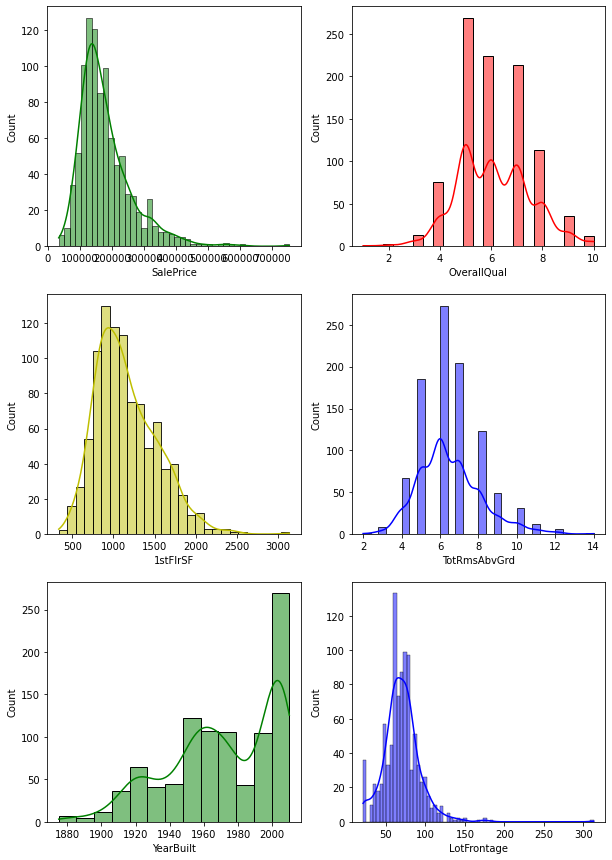

In [63]:
print ("HISTOGRAMAS PARA DATOS TRAINING")
f,eje = plt.subplots(3,2,sharex=False, figsize=(10,15))
for i in range(0,len(columnas)): 
    sns.histplot(train_frame[columnas[i]] , color=colores[i], kde=True, ax=eje[i//2, i%2])

HISTOGRAMAS PARA DATOS TESTING


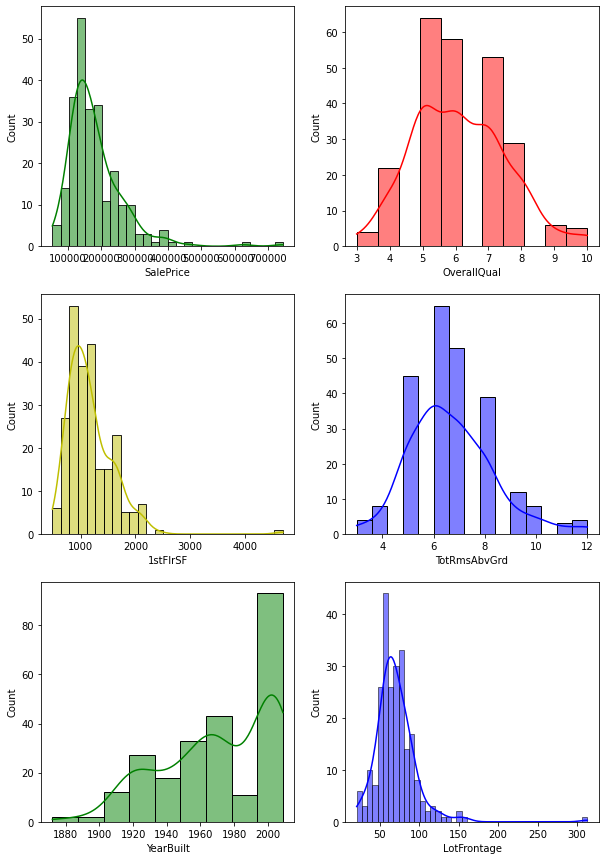

In [65]:
print ("HISTOGRAMAS PARA DATOS TESTING") ## Aqui los datos tienen que salir menores, por ser solo el 20%
f,eje = plt.subplots(3,2,sharex=False, figsize=(10,15))
for i in range(0,len(columnas)): 
    sns.histplot(test_frame[columnas[i]] , color=colores[i], kde=True, ax=eje[i//2, i%2])